## Team members:

* Maja Świerk
* Jakub Konieczny

## 0. Data Loading


1. Code for "Choose Files ..."
2. Upload to Colab FileSystem



In [ ]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving datos.csv to datos.csv
User uploaded file "datos.csv" with length 118064 bytes


### 0.1 Reading dataset and displaying main infromation about it 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/worldcup_2018_final_data.csv', index_col = [0])

In [ ]:
df.head()

,team_name,team_round,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,...,fouls_recieved_average,yellow_cards_average,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average
1,Argentina,Round of 16,1.50,0.00,1.50,0.00,0.00,0.00,0.0,1.25,...,19.00,2.75,0.00,18.5,15.0,1.50,3.75,1.24,1.04,0.09
2,Australia,Group stage,0.00,0.67,0.67,0.00,0.00,0.67,0.0,0.67,...,10.00,2.33,0.00,17.0,12.0,3.00,4.67,1.17,-1.50,0.10
3,Belgium,Third,2.14,0.14,2.29,0.00,0.00,0.14,0.0,1.72,...,10.57,1.57,0.00,14.0,11.0,3.57,4.57,1.70,4.13,0.11
4,Brazil,Quarter-finals,1.40,0.20,1.60,0.20,0.00,0.00,0.0,1.20,...,14.40,1.40,0.00,16.0,13.0,1.00,1.40,2.47,-4.35,0.12
5,Colombia,Round of 16,0.50,1.00,1.50,0.75,0.25,0.00,0.0,0.75,...,13.00,2.25,0.25,14.0,8.0,2.50,3.25,0.68,3.28,0.07


In [ ]:
df.columns

Index(['team_name', 'team_round', 'goals_scored_open_play_average',
       'goals_scored_set_play_average', 'goals_scored_average',
       'goals_scored_corner_average', 'goals_scored_free_kick_average',
       'goals_scored_penalty_average', 'goals_scored_.throw_in_average',
       'goal_scored_foot_average', 'goals_scored_header_average',
       'goals_scored_own_goal_average', 'final_third_entries_average',
       'penalty_area_entries_average', 'shot_precision_percentage',
       'shots_per_goal_average', 'shots_on_target_per_goal_average',
       'shots_inside_penalty_area_per_goal_average',
       'shots_outside_penalty_area_per_goal_average',
       'shots_scored_inside_penalty_area_percentage',
       'shots_scored_outside.penalty_area_percentage',
       'shots_on_target_average', 'shots_average', 'clean_sheets_percentage',
       'goals_conceded_average', 'shots_conceded_average',
       'possession_average', 'passes_average', 'passes_completed_percentage',
       'passes_com

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 32
Data columns (total 69 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   team_name                                      32 non-null     object 
 1   team_round                                     32 non-null     object 
 2   goals_scored_open_play_average                 32 non-null     float64
 3   goals_scored_set_play_average                  32 non-null     float64
 4   goals_scored_average                           32 non-null     float64
 5   goals_scored_corner_average                    32 non-null     float64
 6   goals_scored_free_kick_average                 32 non-null     float64
 7   goals_scored_penalty_average                   32 non-null     float64
 8   goals_scored_.throw_in_average                 32 non-null     float64
 9   goal_scored_foot_average                       32 non-nu

### 0.2 Feature Selection

1. Excluding non-numeric features

2. Selecting features connected to defending

In [ ]:
exclude = ['team_name', 'team_round']
df_task = df.loc[:, df.columns.difference(exclude)]

In [ ]:
df_def = df_task[['clean_sheets_percentage', 'goals_conceded_average', 'shots_conceded_average', 'shots_on_target_conceded_average', 'recoveries_average', 'clearances_average', 'interceptations_average', 'steals_attemped_average', 'steals_completed_average', 'steals_completed_percentage', 'duels_won_percentage']]

For this study we have chosen subset of features connected to defending.\
We will use: \
- clean_sheets_percentage
- clean_sheets_percentage
- shots_conceded_average
- shots_on_target_conceded_average
- recoveries_average
- clearances_average
- interceptations_average 
- steals_attemped_average
- steals_completed_average 
- steals_completed_percentage 
- duels_won_percentage


## 1. Correlation among features and data normalization

### 1.1 Correlation

1. Creating correlation matrix

In [ ]:
import seaborn as sns

mtx_corr_def = df_def.corr()

2. Correlation visualization

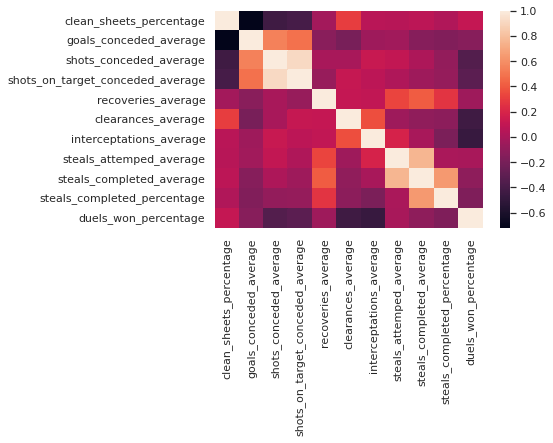

In [ ]:
sns.heatmap(mtx_corr_def, xticklabels=mtx_corr_def.columns, yticklabels=mtx_corr_def.columns, annot=False)

3. Bref Conclusions \
We can see that there is high negative correlation bettween goals_conceded_average and clean_sheets_percentage. Another correlation can be seen between shots_conceded_average and shots_on_target_conceded_average. Both of them seem logical.

### 1.2 Normalization and vizualization set

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
scaler = preprocessing.StandardScaler()
df_def_norm = scaler.fit_transform(df_def)

1. X_viz will be used for vizualization of the data

In [ ]:
pca_viz = PCA(n_components=2)
X_viz = pca_viz.fit_transform(df_def_norm)

## 2. Outlier Identification


### 2.1 Outliers in our data with DBSCAN 

In [ ]:

import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(df_def_norm)


import plotly.express as px

fig = px.imshow(matsim)
fig.show()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy

minPts=4

A = kneighbors_graph(df_def_norm, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(df_def_norm):
    for j in range(len(df_def_norm)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()

In [ ]:
fig = px.line(x=numpy.arange(0, len(seq), 1), y=seq)
fig.show()

In [ ]:
import numpy
from sklearn.cluster import DBSCAN
minPts = 3

results = []
for eps in numpy.arange(2.1, 3.5, 0.1):
  db = DBSCAN(eps, min_samples=minPts).fit(df_def_norm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  #print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))
  results.append([eps, n_clusters_, n_outliers])

#print results
from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
  2.1           0          32
  2.2           1          29
  2.3           2          24
  2.4           3          19
  2.5           3          15
  2.6           3          15
  2.7           1          14
  2.8           1          10
  2.9           1           7
  3             1           7
  3.1           1           6
  3.2           1           6
  3.3           1           6
  3.4           1           6


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3.4, min_samples=4)
dbscan.fit(df_def_norm)

labels = dbscan.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0])

In [ ]:
# plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_viz [:,0], y= X_viz [:,1], color = labels)

for i in range(0,len(df_def)):
     fig.add_annotation(x = X_viz [i,0], y = X_viz [i,1], text = df.iloc[i,:].team_name)
fig.show()

In [ ]:
df_def['dbscan_group'] = labels

df_def[df_def['dbscan_group'] == -1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,dbscan_group
16,0.33,1.00,5.00,5.00,52.00,29.33,13.00,14.67,12.67,0.864,0.421,-1
17,0.25,1.50,7.75,7.50,53.00,17.25,11.75,18.75,11.50,0.613,0.503,-1
20,0.00,3.67,6.33,6.67,47.33,22.67,11.00,14.33,8.00,0.558,0.465,-1
28,0.25,1.50,1.75,1.75,47.00,11.00,7.50,13.25,8.50,0.642,0.528,-1
29,0.60,0.80,3.00,2.80,46.40,31.80,10.40,13.20,5.40,0.409,0.496,-1
31,0.00,2.67,8.33,5.33,55.67,12.00,10.33,17.00,10.33,0.608,0.476,-1


In [ ]:
df_def.describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,dbscan_group
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,0.223750,1.371563,4.176563,3.933750,55.738125,20.938750,10.618437,16.45250,10.307188,0.626469,0.494688,-0.187500
std,0.217934,0.681545,1.451254,1.324369,4.892607,5.676865,2.890134,2.32957,1.898174,0.081865,0.033226,0.396558
min,0.000000,0.500000,1.750000,1.400000,46.400000,10.670000,6.750000,12.71000,5.400000,0.409000,0.421000,-1.000000
25%,0.000000,0.845000,3.310000,3.000000,52.875000,16.670000,8.000000,14.91750,9.105000,0.572500,0.466750,0.000000
50%,0.250000,1.330000,4.000000,3.775000,55.830000,20.835000,10.310000,16.16500,10.670000,0.620000,0.501500,0.000000
75%,0.330000,1.670000,4.720000,5.000000,58.000000,25.847500,12.167500,18.08250,11.347500,0.673750,0.514500,0.000000
max,0.600000,3.670000,8.330000,7.500000,67.860000,31.800000,18.000000,22.67000,15.000000,0.864000,0.551000,0.000000


### 2.2 Analysis why these elements are outliers and decision whether or not to consider them for further analysis.

Even though we have detected 6 outliers, we will keep them for futher analysis because they do no have any extreme values, they are only a bit bigger or smaller than others. We belive that they represent natural variations between teams. Moreover there is no feature that distinguish them from the rest of the teams. Those outliers have usually 2 or 3 values that are bigger than normally while other values are completely standard.

In [ ]:
df_def.drop(columns='dbscan_group', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy





### 2.3 Conclusions

Dataset is consistent in terms of values, some differences between them maybe a result of teams' game style or by low number of matches played (for example teams that ended tournament on a group stage played only 3 matches and one extraordinary match, which has big influence on data).

## 3. Principal Component Analysis

### 3.1 Standarization/Normalization

The data has to be [standarized](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) or [normalized](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) 


Because we did not exclude any data from our data set, standarization and PCA for vizualization is redundant (we already did that step). Although we will repeat it once again, so that in the future, if we exlude some outliers from our dataset, normalization is conducted.


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
teams = scaler.fit_transform(df_def)

### 3.2 Execute the PCA 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(teams)
X_pca.shape

(32, 11)

#### 1. Executing PCA for visualization dataset

In [ ]:
pca_viz = PCA(n_components=2)
X_viz = pca_viz.fit_transform(teams)

In [ ]:
pca_viz.explained_variance_ratio_

array([0.26611289, 0.21191887])

#### 2. Executing PCA for clustering dataset

In [ ]:
pca_cl = PCA(n_components=0.8)
X_cl = pca_cl.fit_transform(teams)

In [ ]:
pca_cl.explained_variance_ratio_

array([0.26611289, 0.21191887, 0.17497376, 0.10202228, 0.0767395 ])

### 3.3 Visualization of the Data

Using a 2D chart to visualize the data. The color of the points is related to the final phase achieved by the teams.


In [ ]:
import plotly.express as px

fig = px.scatter(x=X_viz[:,0], y= X_viz[:,1], color=df.team_round)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

### 3.4 Conclusions


After visualization of the data it is hard to provide some clear conclusions. Nevertheless in general we can see that in lower and right part of the chart there are mostly teams that ended tournament at group-stage and some that ended at round of 16. Better teams are placed at top left corner, but there is no clear separation (for example Runner-up is more towards the middle or even bottom). Moreover we can see 3 teams on the top of the plot that can be outliers or create own cluster. Teams of Brazil and Panama are also quite far from the other nations. 

## 4. K-means


For K-means we are using data processed with PCA algorithm 
with over 80% accumulated variance ratio of original data.


### 4.1 Obtain the parameter **k**

We are using elbow + silohouette method

1. We are searching for best k in range between 2 and 8


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 8):
    km = KMeans(n_clusters = i, random_state=10)
    labels = km.fit_predict(X_cl)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_cl, labels))

2. Plotting the computed values of distortions and silhouettes.


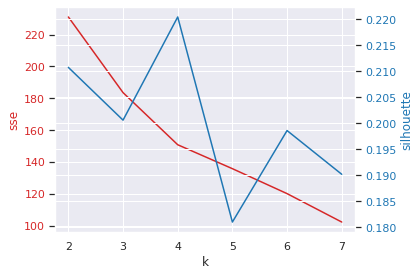

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(2,8)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Basing on both elbow and silhoutte mothod we can assume that the best possible k is 4.

### 4.2 Execution of k-means

We have decided to use standard paramiters and k = 4. 

In [ ]:
k = 4

from sklearn.metrics import confusion_matrix

km4 = KMeans(n_clusters=k, random_state=10)
labels = km4.fit_predict(X_cl)
centrorids = km4.cluster_centers_
labels

array([0, 0, 0, 3, 3, 2, 3, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 3, 2, 3, 3,
       0, 3, 0, 0, 3, 0, 1, 0, 2, 3], dtype=int32)

### 4.3 Visualization

Visualization of the clustering results (color = label) using the PCA with two components data. 



In [ ]:
import plotly.express as px

fig = px.scatter(x=X_viz[:,0], y= X_viz[:,1], color=labels)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

### 4.4 Interpretation of the results

#### 1. Introducing the labels in the original dataframe

In [ ]:
df_def['label'] = labels


df_def.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,0.223750,1.371563,4.176563,3.933750,55.738125,20.938750,10.618437,16.45250,10.307188,0.626469,0.494688,1.562500
std,0.217934,0.681545,1.451254,1.324369,4.892607,5.676865,2.890134,2.32957,1.898174,0.081865,0.033226,1.293595
min,0.000000,0.500000,1.750000,1.400000,46.400000,10.670000,6.750000,12.71000,5.400000,0.409000,0.421000,0.000000
25%,0.000000,0.845000,3.310000,3.000000,52.875000,16.670000,8.000000,14.91750,9.105000,0.572500,0.466750,0.000000
50%,0.250000,1.330000,4.000000,3.775000,55.830000,20.835000,10.310000,16.16500,10.670000,0.620000,0.501500,2.000000
75%,0.330000,1.670000,4.720000,5.000000,58.000000,25.847500,12.167500,18.08250,11.347500,0.673750,0.514500,3.000000
max,0.600000,3.670000,8.330000,7.500000,67.860000,31.800000,18.000000,22.67000,15.000000,0.864000,0.551000,3.000000


#### 2. Extracting the characteristics of each group


In [ ]:
df_def[df_def['label'] == 0].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.097273,1.499091,3.738182,3.589091,54.917273,16.150000,8.289091,15.399091,9.850000,0.640000,0.513727,0.0
std,0.150139,0.443699,0.895297,0.961524,4.044431,3.583292,1.335780,2.119724,1.531888,0.057189,0.021411,0.0
min,0.000000,0.860000,1.750000,1.750000,47.000000,10.670000,6.750000,12.710000,6.710000,0.528000,0.480000,0.0
25%,0.000000,1.290000,3.415000,3.000000,53.820000,14.875000,7.625000,13.340000,9.070000,0.620000,0.501500,0.0
50%,0.000000,1.330000,3.670000,3.570000,55.670000,16.670000,8.000000,15.670000,9.670000,0.642000,0.511000,0.0
75%,0.195000,1.585000,4.585000,4.285000,57.335000,17.360000,8.000000,16.625000,11.000000,0.674000,0.520500,0.0
max,0.430000,2.330000,4.710000,5.000000,61.000000,23.670000,11.000000,18.750000,12.000000,0.744000,0.551000,0.0


In [ ]:
df_def[df_def['label'] == 1].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.0
mean,0.476667,0.656667,3.916667,3.823333,50.076667,28.656667,11.273333,15.04000,7.966667,0.523667,0.476333,1.0
std,0.136504,0.150444,0.877971,1.107986,3.556773,2.753658,3.055100,2.33737,2.345918,0.100431,0.017039,0.0
min,0.330000,0.500000,3.000000,2.800000,46.400000,26.670000,8.750000,13.20000,5.400000,0.409000,0.466000,1.0
25%,0.415000,0.585000,3.500000,3.235000,48.365000,27.085000,9.575000,13.72500,6.950000,0.487500,0.466500,1.0
50%,0.500000,0.670000,4.000000,3.670000,50.330000,27.500000,10.400000,14.25000,8.500000,0.566000,0.467000,1.0
75%,0.550000,0.735000,4.375000,4.335000,51.915000,29.650000,12.535000,15.96000,9.250000,0.581000,0.481500,1.0
max,0.600000,0.800000,4.750000,5.000000,53.500000,31.800000,14.670000,17.67000,10.000000,0.596000,0.496000,1.0


In [ ]:
df_def[df_def['label'] == 2].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.0
mean,0.035714,2.132857,6.105714,5.547143,55.035714,21.548571,12.631429,16.51000,9.690000,0.585286,0.469000,2.0
std,0.094491,0.779374,1.464512,1.118119,5.597160,5.089798,3.161705,1.62108,1.286079,0.027566,0.029928,0.0
min,0.000000,1.500000,4.330000,4.330000,47.330000,12.000000,9.000000,14.33000,8.000000,0.543000,0.421000,2.0
25%,0.000000,1.670000,5.165000,5.000000,51.835000,19.960000,10.665000,15.41500,8.665000,0.569500,0.455500,2.0
50%,0.000000,1.750000,5.670000,5.000000,54.250000,23.670000,11.750000,16.33000,10.000000,0.582000,0.465000,2.0
75%,0.000000,2.335000,7.040000,6.000000,58.335000,24.500000,14.170000,17.66500,10.500000,0.610000,0.489500,2.0
max,0.250000,3.670000,8.330000,7.500000,63.330000,26.250000,18.000000,18.75000,11.500000,0.613000,0.507000,2.0


In [ ]:
df_def[df_def['label'] == 3].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.400909,0.954545,3.458182,3.281818,58.550000,23.234545,11.488182,17.854545,11.795455,0.667182,0.497000,3.0
std,0.139818,0.325434,0.939125,1.045522,4.137949,4.566144,2.545454,2.382635,1.467429,0.093004,0.037427,0.0
min,0.200000,0.600000,1.800000,1.400000,52.000000,16.200000,7.330000,14.670000,10.000000,0.542000,0.421000,3.0
25%,0.330000,0.670000,2.930000,2.635000,56.485000,19.835000,9.810000,16.000000,10.830000,0.608000,0.479000,3.0
50%,0.330000,0.860000,3.330000,3.000000,57.670000,23.330000,11.330000,17.600000,11.400000,0.672000,0.506000,3.0
75%,0.535000,1.310000,4.100000,3.970000,59.665000,26.715000,13.500000,19.335000,12.335000,0.699000,0.523000,3.0
max,0.600000,1.400000,5.000000,5.000000,67.860000,29.330000,15.800000,22.670000,15.000000,0.864000,0.537000,3.0


In [ ]:
df_def['team_round'] = df['team_round'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_def[df_def['label'] == 0].groupby('team_round')['label'].count()

team_round
Fourth         1
Group stage    5
Round of 16    4
Third          1
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 1].groupby('team_round')['label'].count()

team_round
Group stage       1
Quarter-finals    1
Round of 16       1
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 2].groupby('team_round')['label'].count()

team_round
Group stage    5
Round of 16    2
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 3].groupby('team_round')['label'].count()

team_round
Champion          1
Group stage       5
Quarter-finals    3
Round of 16       1
Runner-up         1
Name: label, dtype: int64

#### 3. Characteristics of each group:


Group 0:
* The lowest mean value in interceptations_average column
* The lowest mean value in clearances_average column.

Group 1:
* The lowest mean value in goals_conceded_average column.
* The lowest mean value in recoveries_avarage column. 
* The lowest mean value in steals_completed_average column.

Group 2:
* The highest mean value in shots_conceded_average column. 
* The highest mean value in shots_on_target_conceded_average column.
* The highest mean value in clearence_avarage column.
* The highest mean value interceptations_average column.

Group 3:
* The highest mean value in recoveries_average column.
* The highest mean value in steals_attemped_average column.
* The highest mean value in steals_completed_average column.


We do not see any correlation between K-means groups and the stage on which teams ended tournament.

In [ ]:
df_def.drop(columns=['team_round', 'label'], inplace=True)

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage
1,0.00,2.25,3.50,3.75,49.00,18.50,7.75,16.50,11.25,0.682,0.513
2,0.00,1.67,4.67,4.67,58.00,23.67,8.00,15.00,9.33,0.622,0.503
3,0.43,0.86,4.71,4.57,55.86,16.86,7.43,13.43,9.14,0.681,0.511
4,0.60,0.60,1.80,1.40,56.40,16.20,12.00,17.60,11.40,0.648,0.524
5,0.50,0.75,3.25,3.25,62.75,25.75,9.00,15.75,11.25,0.714,0.449
6,0.00,1.67,5.33,5.00,61.00,25.00,12.67,18.33,10.67,0.582,0.451
7,0.29,1.29,4.00,4.14,67.86,27.29,10.29,16.00,10.86,0.679,0.519
8,0.50,0.50,4.75,5.00,53.50,27.50,8.75,14.25,8.50,0.596,0.467
9,0.00,2.00,5.67,5.00,63.33,24.00,18.00,16.33,10.00,0.612,0.421
10,0.14,1.14,3.57,3.57,55.14,17.86,8.00,12.71,6.71,0.528,0.548


## 5. Hierarchical Clustering Algorithm

### 5.1 Computing the similarity matrix and visualization.


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



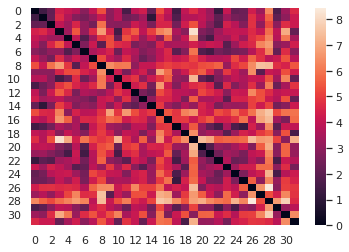

In [ ]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_cl)

import seaborn as sns; sns.set()
ax = sns.heatmap(matsim)

In [ ]:
from scipy.spatial.distance import pdist, squareform


row_dist = pd.DataFrame(squareform(pdist(X_pca, metric='euclidean')),
                        columns=df.team_name,
                        index=df.team_name)
row_dist

team_name,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
team_name,,,,,,,,,,,,,,,,,,,,,
Argentina,0.000000,2.899235,3.824377,4.881786,4.973500,4.441949,4.777555,4.874754,5.941079,4.274070,...,2.239413,4.557894,2.934656,3.261041,4.543521,3.616356,6.603106,2.581896,4.450069,5.352675
Australia,2.899235,0.000000,2.877781,5.253918,3.989727,2.969174,3.065114,3.402310,4.598982,3.163525,...,2.518769,3.386766,3.014535,3.013945,4.917397,4.736684,5.799800,3.291965,4.008809,5.149967
Belgium,3.824377,2.877781,0.000000,4.306616,3.626039,4.747858,3.749954,2.784628,5.952502,3.161966,...,2.431301,4.719611,4.409963,3.136671,5.242022,3.962647,5.624489,3.850605,4.965406,4.548184
Brazil,4.881786,5.253918,4.306616,0.000000,3.958844,5.784417,4.543498,5.088098,6.826730,5.029357,...,3.575576,4.468228,4.589450,4.231569,4.997657,4.212357,6.156239,4.273053,7.146001,2.363175
Colombia,4.973500,3.989727,3.626039,3.958844,0.000000,4.135432,2.929483,3.446989,5.152511,5.480518,...,3.692622,3.767684,4.339138,4.033374,4.945562,5.741853,6.383576,4.664333,6.340990,4.261888
Costa Rica,4.441949,2.969174,4.747858,5.784417,4.135432,0.000000,3.628244,4.236776,2.438284,5.415554,...,4.102699,2.226129,3.544871,4.615687,4.721887,6.656576,6.766932,3.499547,3.882080,4.885707
Croatia,4.777555,3.065114,3.749954,4.543498,2.929483,3.628244,0.000000,4.243917,4.819986,4.752450,...,3.641448,2.887333,3.748898,3.752741,4.550646,6.125587,6.814443,4.518903,5.723199,4.734500
Denmark,4.874754,3.402310,2.784628,5.088098,3.446989,4.236776,4.243917,0.000000,5.428370,4.122031,...,3.887936,4.147035,5.400275,4.663040,5.876597,5.379500,4.123677,4.751189,5.739904,4.465470
Egypt,5.941079,4.598982,5.952502,6.826730,5.152511,2.438284,4.819986,5.428370,0.000000,6.607156,...,5.798917,3.634583,5.109234,5.313597,6.663207,7.713124,7.638471,5.064053,4.678675,5.571535


### 5.2 Executing the hierarchical clustering algorithm. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



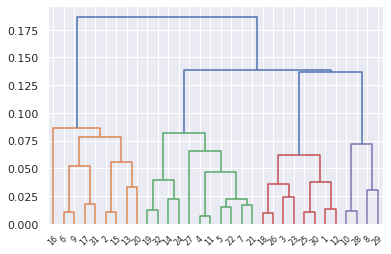

<Figure size 432x288 with 0 Axes>

In [ ]:
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete', metric='cosine')

dend = cluster.hierarchy.dendrogram(clusters, labels = df.index, color_threshold=0.1)

f = plt.figure()
plt.show()


### 5.3 Selecting cut point of the dendrogram

In [ ]:
labels = cluster.hierarchy.fcluster(clusters, 0.1 , criterion = 'distance')
labels

array([3, 1, 3, 2, 2, 1, 2, 4, 1, 4, 2, 3, 1, 2, 1, 1, 1, 3, 2, 1, 2, 2,
       3, 2, 3, 3, 2, 4, 4, 3, 1, 2], dtype=int32)

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics


silhouettes = []

for cut in numpy.arange(0.01, 0.175, 0.01):
  labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
  silhouettes.append(metrics.silhouette_score(X_cl, labels))


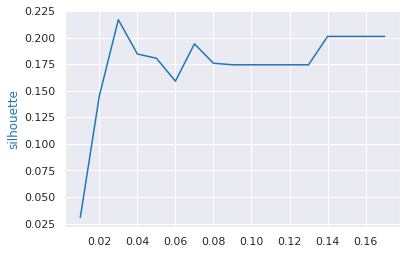

In [ ]:
x = numpy.arange(0.01, 0.175, 0.01)
color = 'tab:blue'
plt.plot(x, silhouettes, color=color)
plt.ylabel('silhouette', color=color)
plt.show()

In [ ]:
labels = cluster.hierarchy.fcluster(clusters, 0.03 , criterion = 'distance')
labels

array([15,  3, 13,  9, 10,  1, 10, 17,  1, 16,  9, 15,  4,  8,  3,  6,  2,
       12,  7,  5, 10, 10, 13,  8, 14, 12, 11, 16, 18, 14,  2,  7],
      dtype=int32)

Despite silhouettes metric is showing that the best choose would be setting cut at 0.03, it would separate dataset into over 16 clusters which is too much considering that we have only 32 samples. For our clusterization we will use 0.1 as it seprates data into 4 clusters (groups are going to be quite equal and also it is same number of clusters as in k-means).

In [ ]:
labels = cluster.hierarchy.fcluster(clusters, 0.1 , criterion = 'distance')
labels

array([3, 1, 3, 2, 2, 1, 2, 4, 1, 4, 2, 3, 1, 2, 1, 1, 1, 3, 2, 1, 2, 2,
       3, 2, 3, 3, 2, 4, 4, 3, 1, 2], dtype=int32)

### 5.4 Vizualization

In [ ]:
import plotly.express as px
fig = px.scatter(x=X_viz [:,0], y= X_viz [:,1], color = labels)

for i in range(0,len(df_def)):
     fig.add_annotation(x = X_viz [i,0], y = X_viz [i,1], text = df.iloc[i,:].team_name)
fig.show()

### 5.5 Characteristics of each group:

In [ ]:
df_def['label'] = labels

df_def.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,0.223750,1.371563,4.176563,3.933750,55.738125,20.938750,10.618437,16.45250,10.307188,0.626469,0.494688,2.218750
std,0.217934,0.681545,1.451254,1.324369,4.892607,5.676865,2.890134,2.32957,1.898174,0.081865,0.033226,1.007532
min,0.000000,0.500000,1.750000,1.400000,46.400000,10.670000,6.750000,12.71000,5.400000,0.409000,0.421000,1.000000
25%,0.000000,0.845000,3.310000,3.000000,52.875000,16.670000,8.000000,14.91750,9.105000,0.572500,0.466750,1.000000
50%,0.250000,1.330000,4.000000,3.775000,55.830000,20.835000,10.310000,16.16500,10.670000,0.620000,0.501500,2.000000
75%,0.330000,1.670000,4.720000,5.000000,58.000000,25.847500,12.167500,18.08250,11.347500,0.673750,0.514500,3.000000
max,0.600000,3.670000,8.330000,7.500000,67.860000,31.800000,18.000000,22.67000,15.000000,0.864000,0.551000,4.000000


In [ ]:
df_def[df_def['label'] == 1].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.064444,1.955556,5.823333,5.388889,55.027778,22.648889,12.157778,16.137778,9.981111,0.620333,0.467444,1.0
std,0.129433,0.779360,1.389019,1.021304,5.074091,5.118485,3.153275,1.588480,1.507120,0.095219,0.033189,0.0
min,0.000000,1.000000,4.330000,4.330000,47.330000,12.000000,8.000000,14.330000,8.000000,0.543000,0.421000,1.0
25%,0.000000,1.670000,5.000000,5.000000,52.000000,22.670000,10.330000,15.000000,9.000000,0.581000,0.451000,1.0
50%,0.000000,1.670000,5.330000,5.000000,54.250000,23.670000,11.750000,15.500000,10.000000,0.608000,0.465000,1.0
75%,0.000000,2.000000,6.330000,5.330000,58.000000,25.000000,13.000000,17.000000,10.670000,0.613000,0.503000,1.0
max,0.330000,3.670000,8.330000,7.500000,63.330000,29.330000,18.000000,18.750000,12.670000,0.864000,0.507000,1.0


In [ ]:
df_def[df_def['label'] == 2].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.0
mean,0.400909,0.924545,3.367273,3.160909,58.398182,22.992727,11.64000,18.127273,11.552727,0.640091,0.501091,2.0
std,0.139818,0.335868,0.815170,0.892686,4.423105,4.272016,2.69032,2.141122,1.527881,0.070658,0.030015,0.0
min,0.200000,0.600000,1.800000,1.400000,50.330000,16.200000,7.33000,15.750000,10.000000,0.542000,0.449000,2.0
25%,0.330000,0.670000,2.930000,2.635000,56.485000,19.835000,9.81000,16.355000,10.735000,0.567000,0.479500,2.0
50%,0.330000,0.750000,3.330000,3.000000,57.670000,23.330000,11.33000,17.670000,11.250000,0.662000,0.506000,2.0
75%,0.535000,1.310000,4.000000,3.735000,59.665000,26.405000,14.00000,19.335000,11.715000,0.681500,0.523000,2.0
max,0.600000,1.400000,4.670000,4.670000,67.860000,28.800000,15.80000,22.670000,15.000000,0.750000,0.537000,2.0


In [ ]:
df_def[df_def['label'] == 3].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.00000,8.000000,8.000000,8.0
mean,0.085000,1.522500,3.891250,3.686250,55.493750,15.64000,8.460000,16.053750,10.47625,0.656000,0.509000,3.0
std,0.164577,0.507958,0.652324,0.812297,3.559285,2.40006,1.550097,2.052684,1.09393,0.050407,0.020396,0.0
min,0.000000,0.860000,3.000000,2.670000,49.000000,10.67000,6.750000,13.000000,9.00000,0.574000,0.480000,3.0
25%,0.000000,1.310000,3.457500,3.000000,54.562500,15.43750,7.670000,15.110000,9.53750,0.634500,0.498750,3.0
50%,0.000000,1.330000,3.710000,3.625000,55.765000,16.33500,8.000000,16.250000,10.71000,0.654500,0.510500,3.0
75%,0.062500,1.687500,4.542500,4.142500,57.167500,16.71750,8.687500,17.145000,11.27000,0.681250,0.512250,3.0
max,0.430000,2.330000,4.710000,5.000000,61.000000,18.50000,11.000000,18.750000,12.00000,0.744000,0.551000,3.0


In [ ]:
df_def[df_def['label'] == 4].describe()

,clean_sheets_percentage,goals_conceded_average,shots_conceded_average,shots_on_target_conceded_average,recoveries_average,clearances_average,interceptations_average,steals_attemped_average,steals_completed_average,steals_completed_percentage,duels_won_percentage,label
count,4.000000,4.000000,4.000000,4.000000,4.0000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.0
mean,0.372500,0.985000,3.267500,3.280000,50.5100,22.040000,8.662500,13.352500,7.277500,0.543750,0.50975,4.0
std,0.213756,0.431548,1.246819,1.367942,4.4568,9.388347,1.267133,0.646033,1.509534,0.101306,0.03565,0.0
min,0.140000,0.500000,1.750000,1.750000,46.4000,11.000000,7.500000,12.710000,5.400000,0.409000,0.46700,4.0
25%,0.222500,0.725000,2.687500,2.537500,46.8500,16.145000,7.875000,13.077500,6.382500,0.498250,0.48875,4.0
50%,0.375000,0.970000,3.285000,3.185000,50.2500,22.680000,8.375000,13.225000,7.605000,0.562000,0.51200,4.0
75%,0.525000,1.230000,3.865000,3.927500,53.9100,28.575000,9.162500,13.500000,8.500000,0.607500,0.53300,4.0
max,0.600000,1.500000,4.750000,5.000000,55.1400,31.800000,10.400000,14.250000,8.500000,0.642000,0.54800,4.0


In [ ]:
df_def['team_round'] = df['team_round'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_def[df_def['label'] == 1].groupby('team_round')['label'].count()

team_round
Group stage    7
Round of 16    2
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 2].groupby('team_round')['label'].count()

team_round
Champion          1
Group stage       5
Quarter-finals    3
Round of 16       1
Runner-up         1
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 3].groupby('team_round')['label'].count()

team_round
Group stage    4
Round of 16    3
Third          1
Name: label, dtype: int64

In [ ]:
df_def[df_def['label'] == 4].groupby('team_round')['label'].count()

team_round
Fourth            1
Quarter-finals    1
Round of 16       2
Name: label, dtype: int64

Group 1:
* Highest mean value in shots_conceded_average.
* Highest mean value in shots_on_target_conceded_average.
* Highest mean value in interceptations_average (similar to label 2).
* Highest mean value in goals_conceded_average.
* Very different mean value in duels_won_percentage in comparison to other groups.

Group 2:
* Highest mean value in steals_attemped_average.
* Highest mean value in steals_completed_average.
* Highest mean value in recoveries_average.
* Lowest mean value in goals_conceded_average.

Group 3:
* Lowest mean value in clearances_average.
* Very similar mean value as label 4 in interceptions_avarage column.

Group 4:
* Lowest mean value in steals_attemped_average.
* Lowest mean value in steals_completed_average.
* Lowest mean value in recoveries_average.

Also hierarchical clustering did not show any correlation between groups and the stage on which teams ended tournament. Nevertheless both K-means and hierarchical clustering groups are very similar with only few minor exceptions. For exmple group '3' from k-means is the same as group '2' from hierarchical.

In [ ]:
df_def.drop(columns=['team_round', 'label'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##6. (Optional) Feature Selection using clustering algorithms
Selected data were not used in clustering process

### 6.1 Transposing dataset

In [ ]:
import numpy as np
df_feat = np.transpose(df_task)
names = df_feat.index.values
df_feat.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
bypassed_defenders_average,29.0,26.00,49.00,45.0,33.00,28.0,30.00,35.0,30.0,33.00,...,33.00,35.0,22.00,33.00,35.00,29.00,36.0,31.00,31.0,31.0
bypassed_opponents_average,273.0,291.00,310.00,332.0,270.00,237.0,278.00,238.0,227.0,281.00,...,299.00,224.0,302.00,217.00,257.00,327.00,195.0,285.00,259.0,230.0
clean_sheets_percentage,0.0,0.00,0.43,0.6,0.50,0.0,0.29,0.5,0.0,0.14,...,0.25,0.2,0.00,0.00,0.33,0.25,0.6,0.00,0.0,0.6
clearances_average,18.5,23.67,16.86,16.2,25.75,25.0,27.29,27.5,24.0,17.86,...,16.00,28.8,16.67,16.67,19.67,11.00,31.8,13.75,12.0,17.4
compactness_in_possesion_average,739.0,843.00,811.00,965.0,819.00,778.0,762.00,803.0,786.0,767.00,...,744.00,746.0,799.00,967.00,861.00,750.00,712.0,924.00,726.0,787.0


### 6.2 Standarization

In [ ]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.StandardScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

### 6.3 PCA and Visualization

In [ ]:
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [9.99964464e-01 3.03857097e-05]


In [ ]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = names[i])
fig.show()

In [ ]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(X_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



### 6.4 Chosing DBSCAN outliers as selected features

In [ ]:
from sklearn.neighbors import kneighbors_graph
import numpy

minPts=3

A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()

In [ ]:
fig = px.line(x=np.arange(0, len(seq), 1), y=seq)
fig.show()

In [ ]:
from sklearn.cluster import DBSCAN
results = []
for eps in np.arange(1.5, 3.5, 0.1):
  db = DBSCAN(eps, min_samples=minPts).fit(X_pca)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  results.append([eps, n_clusters_, n_outliers])
  

from tabulate import tabulate
print(tabulate(results, headers = ("eps", "clusters", "outliers")))

  eps    clusters    outliers
-----  ----------  ----------
  1.5           1           2
  1.6           1           2
  1.7           1           2
  1.8           1           2
  1.9           1           2
  2             1           2
  2.1           1           2
  2.2           1           2
  2.3           1           2
  2.4           1           2
  2.5           1           1
  2.6           1           1
  2.7           1           1
  2.8           1           1
  2.9           1           1
  3             1           1
  3.1           1           1
  3.2           1           1
  3.3           1           1
  3.4           1           1


In [ ]:
db = DBSCAN(eps=1, min_samples=minPts).fit(X_pca)
db.labels_


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = db.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = names[i])
fig.show()

In [ ]:
df_feat['dbscan_group'] = db.labels_

df_fs = df_feat[df_feat['dbscan_group'] == -1]
df_fs.drop(columns= 'dbscan_group', inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_fs.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
distance_covered_average,99880.0,110187.0,105014.0,103138.0,101090.0,106667.0,102747.0,107670.0,109157.0,106986.0,...,103528.0,110716.0,102263.0,101977.0,112987.0,103830.0,105134.0,106563.0,103813.0,104256.0
distance_covered_over20kmh_average,7230.0,8323.0,7567.0,8108.0,7585.0,7203.0,7996.0,7373.0,7887.0,7801.0,...,6853.0,8246.0,7917.0,8137.0,7747.0,7040.0,5966.0,7333.0,8113.0,6774.0


### 6.5 Conclusions



In this case DBSCAN distinguished 2 outliers which could be used as our features in anylisis, but it is a bit too low number especially taking into consideration that at the beginng there where over 60 features.